In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

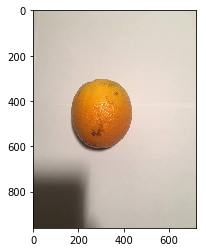

In [3]:
#read image
img = cv2.imread('../photos_images/orange1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

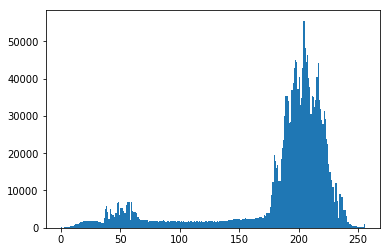

In [4]:
#show histogram to see which treshold we should select
hist = plt.hist(img.ravel(), 256, [0,256])
plt.show(hist)

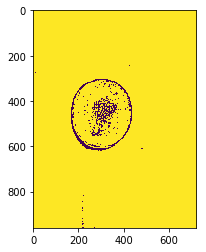

In [18]:
#converting image to graysclae to find threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
thresh = cv2.adaptiveThreshold(gray, 80, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(thresh)

In [30]:
_, cnts, _  = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

NameError: name 'roi' is not defined

In [34]:
#get enhanced image contours
_, cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [35]:
mask = np.zeros_like(img)

In [12]:
#insert fruit area of original image onto a new image with black background

#creating new black image same size as the original
out = np.zeros_like(img)

#selecting all the pixels from mask that are white and replace them with those same 
#pixels from the original image (that correspond to the pixels of the fruit)
out[mask==255] = img[mask==255]

cv2.fillPoly(mask, pts =cnts, color=(255,255,255))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

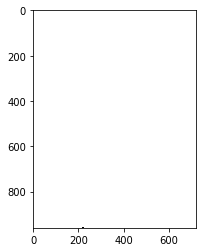

In [13]:
#show the mask we created
plt.imshow(mask)

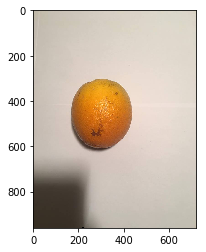

In [180]:
#put back all 3 color dimensions on the mask
img2 = img.copy()
mask[:,:,1] = mask[:,:,0]
mask[:,:,2] = mask[:,:,0]
img2[mask!=255] = 0
plt.imshow(img2)

In [181]:
#get all the rgb values for the mask
r = img2[:,:,0]
g = img2[:,:,1]
b = img2[:,:,2]

In [182]:
#filter all the rgb values for the mask to eliminate the ones that are 0 (black)
r = r[r!=0]
g = g[g!=0]
b = b[b!=0]

In [183]:
#find color by calculating the mean of each color component
[int(r.mean()), int(g.mean()), int(b.mean())]

[199, 182, 166]